In [17]:
# Import package
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

EMAPERIOD = 200


# Get the data
data = yf.download(tickers="SPY", period="120d", interval="1h")


[*********************100%***********************]  1 of 1 completed


In [18]:
# data.to_pickle("MSFT_test_1m")  # where to save it, usually as a .pkl
# data = pd.read_pickle("MSFT_5d_1m")

In [19]:
minuteCloseFull = data["Close"]
minuteHighFull = data["High"]
minuteLowFull = data["Low"]
minuteVolumeFull = data["Volume"]

In [27]:
ema200 = minuteCloseFull.ewm(span=EMAPERIOD).mean()[201:].tolist()
len(ema200)

639

In [5]:
minuteCloseTest = minuteCloseFull[201:]
minuteHighTest = minuteHighFull[201:]
minuteLowTest = minuteLowFull[201:]
minuteVolumeFull = minuteLowFull[201:]



'''Calculate moving 200 period avg to movingAverageTest'''
movingAverageTest = []
for idx in range(len(minuteCloseTest)):
    last200avg = sum(minuteCloseFull[idx : (200+idx)]) / 200
    movingAverageTest.append(last200avg)
    
len(movingAverageTest)

638

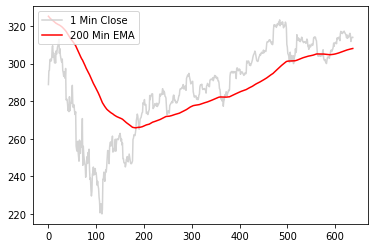

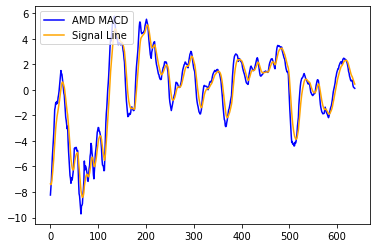

In [6]:
'''plt.scatter(x, y, label= "stars", color= "green", marker= "*", s=30)'''
UseMACD = []
UseSignal = []

def plotMain(buyIdxs=[], sellIdxs=[]):
    global UseMACD, UseSignal
    '''EMA GRAPH'''
    plt.plot(minuteCloseTest.tolist(), label="1 Min Close", color="lightgrey")
    #plt.plot(minuteHighTest.tolist(), label="1 Min High", color="grey")
    #plt.plot(minuteLowTest.tolist(), label="1 Min Low", color="darkgrey")
    #plt.plot(movingAverageTest, label="200 Min SMA", color="blue")
    plt.plot(ema200, label="200 Min EMA", color="red")
    
    for buyIdx in buyIdxs:
        plt.scatter(buyIdx,minuteCloseTest.tolist()[buyIdx], marker="D", color='green')
    for sellIdx in sellIdxs:
        plt.scatter(sellIdx,minuteCloseTest.tolist()[sellIdx], marker="s", color='red')
    
    
    plt.legend(loc='upper left')
    plt.show()




    '''MACD GRAPH'''
    exp1 = minuteCloseFull.ewm(span=12, adjust=False).mean()
    exp2 = minuteCloseFull.ewm(span=26, adjust=False).mean()
    macd = exp1-exp2
    signal = macd.ewm(span=9, adjust=False).mean()

    UseMACD = macd[201:].tolist()
    UseSignal = signal[201:].tolist()

    plt.plot(UseMACD, label='AMD MACD', color = 'blue')
    plt.plot(UseSignal, label='Signal Line', color='orange')
    for buyIdx in buyIdxs:
        plt.scatter(buyIdx,UseMACD[buyIdx], marker="D", color='green')
    for sellIdx in sellIdxs:
        plt.scatter(sellIdx,UseSignal[sellIdx], marker="s", color='red')
    
    plt.legend(loc='upper left')
    plt.show()

plotMain()

In [16]:
def graph(idx, idxRange, upperSell, lowerSell):

    
    if idxRange > idx:
        idxRange = idx
    
    start = idx - idxRange
    end = idx + idxRange
    
    
    plt.plot(minuteCloseTest.tolist()[start:end], label="1 Min Close", color="lightgrey")
    plt.plot(minuteHighTest.tolist()[start:end], label="1 Min High", color="grey")
    plt.plot(minuteLowTest.tolist()[start:end], label="1 Min Low", color="darkgrey")

    plt.plot(ema200[start:end], label="200 Min EMA", color="orange")
    plt.scatter(idxRange,[minuteCloseTest[idx]], color="purple")
    
    plt.plot ([0, idxRange*2], [upperSell,upperSell], color="red")
    plt.plot ( [0, idxRange*2],[lowerSell,lowerSell], color="red")

    plt.legend(loc='upper left')
    plt.show()


    plt.plot(UseMACD[start:end], label='AMD MACD', color = 'blue')
    plt.plot(UseSignal[start:end], label='Signal Line', color='orange')
    plt.legend(loc='upper left')
    plt.show()
    

In [ ]:
"""AI"""
def learn():
    

Buying at  282.7699890136719 214
Loss... Selling at  279.94 219
Trade total:  -100.0  New Budget:  9900.0 219 
------

Buying at  283.75299072265625 233
Loss... Selling at  280.92 247
Trade total:  -100.0  New Budget:  9800.0 247 
------

Buying at  279.220703125 257
Profit! Selling at  283.41 262
Trade total:  149.99999999999818  New Budget:  9949.999999999998 262 
------

Buying at  281.6400146484375 272
Profit! Selling at  285.86 275
Trade total:  149.99999999999818  New Budget:  10099.999999999996 275 
------

Buying at  292.0801086425781 289
Loss... Selling at  289.16 298
Trade total:  -100.0  New Budget:  9999.999999999996 298 
------

Buying at  287.510009765625 317
Loss... Selling at  284.63 330
Trade total:  -99.99999999999818  New Budget:  9899.999999999998 330 
------

Buying at  288.0199890136719 331
Profit! Selling at  292.34 341
Trade total:  149.99999999999818  New Budget:  10049.999999999996 341 
------

Buying at  283.8900146484375 371
Profit! Selling at  288.15 380
Tr

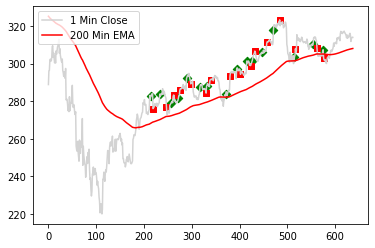

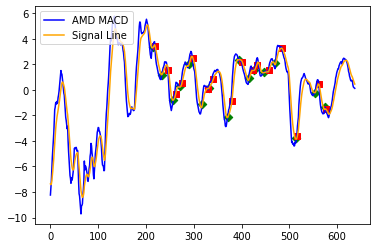

Final Balance:  10399.999999999987 	 Total Trades:  16 	 0.0


In [9]:

def trade():
    budget = 10000
    riskProfitPerc = 1.015
    riskLossPerc = 0.99


    buyIdxs = []
    sellIdxs = []
    
    goodTradesNum = 1
    badTradesNum = 1
    
    updatedBudget = budget
    priceBoughtTmp = 0
    priceSoldTmp = 0
    
    holding = False
    startingIndex = 1
    
    for idx in range(startingIndex, len(minuteCloseTest)):
        price = minuteCloseTest[idx]
        priceHigh = minuteHighTest[idx]
        priceLow = minuteLowTest[idx]
        average = ema200[idx]
        macd = UseMACD[idx]
        signal = UseSignal[idx]

        if holding == False:  # Look for a buy
            
            '''macd last 5 minute below signal check'''
            belowCheck = True
            #print("New Check")
            
            for macdIdx in range(idx-startingIndex, idx):
                #print(UseMACD[macdIdx], UseSignal[macdIdx])
                if UseMACD[macdIdx] >= UseSignal[macdIdx]:
                    belowCheck = False
                    break
            
            
            if price > average:
                if belowCheck == True:
                    #print("4 below, 5th: ", macd, signal)


                    if macd >= signal:
                        print("Buying at ",price, idx)
                        buyIdxs += [idx]
                        priceBoughtTmp = price
                        holding = True
                        
                        #graph(idx,200, priceBoughtTmp * riskProfitPerc, priceBoughtTmp*riskLossPerc)
                        
        if holding == True: # Look for a sell
            
            upperSell = priceBoughtTmp * riskProfitPerc
            lowerSell = priceBoughtTmp*riskLossPerc
            
            if priceHigh >= round(upperSell):
                print("Profit! Selling at ", round(upperSell,2), idx)
                goodTradesNum+=1
                budgetUpdate = - budget + (upperSell/priceBoughtTmp)*budget                
                updatedBudget += budgetUpdate
                sellIdxs += [idx]

                print("Trade total: ", budgetUpdate, " New Budget: ", updatedBudget, idx, "\n------\n")
                
                priceSoldTmp = upperSell
                holding = False
                
            
            elif priceLow <= round(lowerSell): 
                print("Loss... Selling at ", round(lowerSell,2), idx)
                badTradesNum+=1
                budgetUpdate = - budget + (lowerSell/priceBoughtTmp)*budget
                updatedBudget += budgetUpdate
                sellIdxs += [idx]
                
                print("Trade total: ", budgetUpdate, " New Budget: ", updatedBudget, idx, "\n------\n")
                
                priceSoldTmp = lowerSell
                holding = False
            
            else:
                pass
    plotMain(buyIdxs, sellIdxs)
    print("Final Balance: ", updatedBudget, "\t Total Trades: ", (goodTradesNum+badTradesNum-2),"\t", -1+(goodTradesNum/badTradesNum))
            
                    
            
trade() 

In [15]:
print(len(minuteCloseTest),
len(ema200),
len(UseMACD),
len(UseSignal))



638 638 638 638


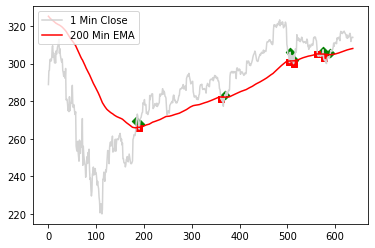

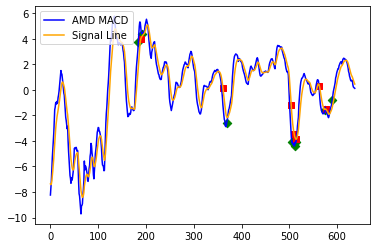

Final Balance:  11048.817976372264 	 Total Trades:  7 3 4


In [14]:
def tradeEMA():
    budget = 10000

    buyIdxs = []
    sellIdxs = []
    
    goodTradesNum = 1
    badTradesNum = 1
    
    updatedBudget = budget
    priceBoughtTmp = 0
    
    holding = False
    startingIndex = 1
    
   
    for idx in range(startingIndex, len(minuteCloseTest)):
        price = minuteCloseTest[idx]
        priceHigh = minuteHighTest[idx]
        priceLow = minuteLowTest[idx]
        average = ema200[idx]
        macd = UseMACD[idx]
        signal = UseSignal[idx]

        if holding == False:  # Look for a buy
            
            
            if price > average:
            
                    #print("Buying at ",price, idx)
                    buyIdxs += [idx]
                    priceBoughtTmp = price
                    holding = True

                        #graph(idx,200, priceBoughtTmp * riskProfitPerc, priceBoughtTmp*riskLossPerc)
                        
        if holding == True: # Look for a sell
            
            if price < average:
            
                    #print("Selling at ",price, idx)
                    budgetUpdate = - budget + (price/priceBoughtTmp)*budget
                    updatedBudget += budgetUpdate
                    sellIdxs += [idx]
                    if price>priceBoughtTmp:
                        goodTradesNum+=1
                    elif price <priceBoughtTmp:
                        badTradesNum+=1
                    
                    #print("Trade total: ", budgetUpdate, " New Budget: ", updatedBudget, idx, "\n------\n")

                    holding = False
                    
            else:
                pass
    
    if holding:
        updatedBudget+=minuteCloseTest[-10]
    plotMain(buyIdxs, sellIdxs)
    print("Final Balance: ", updatedBudget, "\t Total Trades: ", (goodTradesNum+badTradesNum-2), goodTradesNum-1, badTradesNum-1)

tradeEMA()